In [ ]:
#CALCULO DE UMA DFT

--- Análise da FFT Recursiva ---
Frequências de pico detectadas: 15.12 Hz e 40.31 Hz
Amplitudes de pico detectadas: 0.80 e 0.97


TypeError: stem() got an unexpected keyword argument 'color'

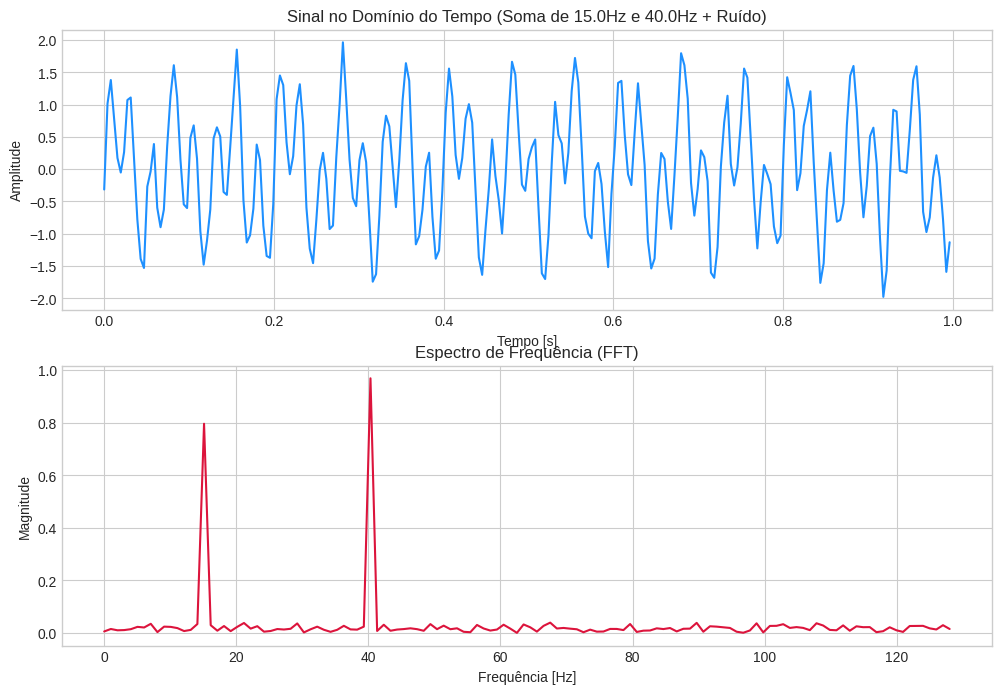

Calculando a DFT... (pode ser lento para N grande)
Cálculo concluído.


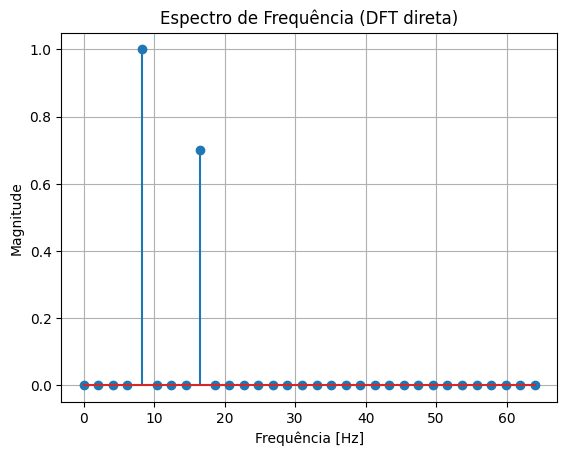

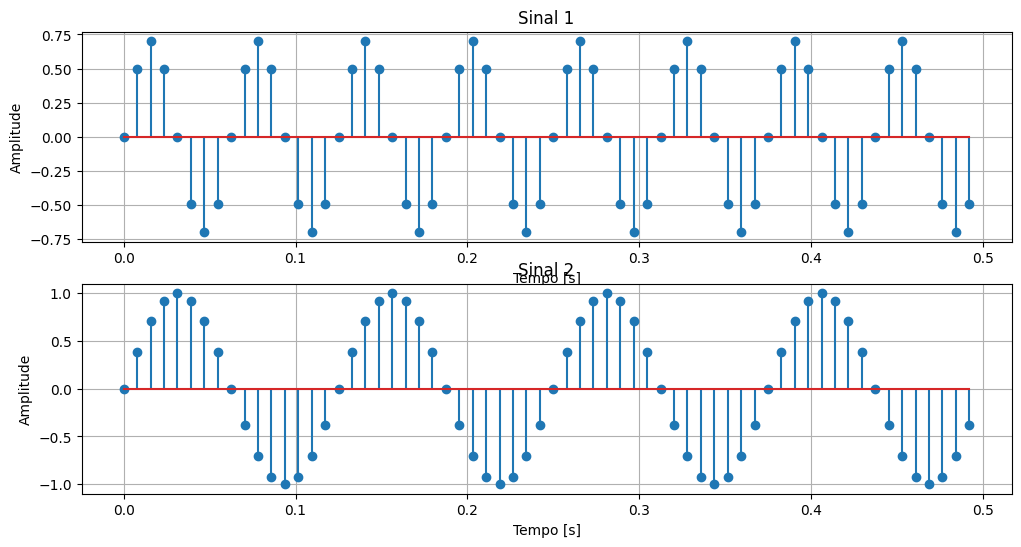

In [ ]:
#ALUNO: JOSÉ IVINES MATOS SILVA
#DICSCIPLINA: PROCESSAMENTO DIGITAL DE SINAIS
#OBJETIVO DO CÓDIGO:IMPLEMENTAÇÃO DA TRANSFORMADA DISCRETA DE FOURIER (DFT)

import numpy as np
import matplotlib.pyplot as plt

#implementando a tranformada de fourier de tempo discreto
def dft_simples(x):
    N = len(x) #seja "x" variável que conterá o sinal de entrada
    X = np.zeros(N, dtype=np.complex128) #criar um array de zeros para armazenar o resultado complexo

    for k in range(N):    # percorre cada componente de frequência "k"

        soma = 0.0 + 0.0j #zera a cada laço reiniciado

        #percorre todas as amostras "n" do sinal de entrada.
        for n in range(N):
            # Aplicão direta da equação da DFT
            termo = x[n] * np.exp(-2j * np.pi * k * n / N)
            soma += termo

        X[k] = soma

    return X

# aplicando a função da DFT
if __name__ == "__main__":
    N = 64 # número de amostras
    fs = 128 # taxa de amostragem
    t = np.linspace(0.0, N/fs, N, endpoint=False)

    # informe a frequencia definida para fhz1 e fh2  (Hz)
    fhz1 = 16 #Hz
    fhz2 = 8 #Hz
    sinal1 = 0.7 * np.sin(fhz1* 2.0 * np.pi * t)
    sinal2 = 1.0 * np.sin(fhz2* 2.0 * np.pi * t)
    sinal = sinal1 + sinal2

    # Calcular a DFT
    print("Calculando a DFT... (pode ser lento para N grande)")
    dft_result = dft_simples(sinal)
    print("Cálculo concluído.")

    freq = np.linspace(0.0, fs/2.0, N//2) #cria um vetor frequência que vai até a Fs
    magnitude = 2.0/N * np.abs(dft_result[0:N//2]) #cria um vetor magnitude que pega somente metade do

    #mostra os sinais de entrada e o resultado da DFT e
    try:
        plt.stem(freq, magnitude)
        plt.title("Espectro de Frequência (DFT direta)")
        plt.xlabel("Frequência [Hz]")
        plt.ylabel("Magnitude")
        plt.grid()
        plt.show()

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.stem(t, sinal1)
        plt.title("Sinal 1")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Amplitude")
        plt.grid()

        plt.subplot(2, 1, 2)
        plt.stem(t, sinal2)
        plt.title("Sinal 2")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Amplitude")
        plt.grid()



    except ImportError:
        print("\nPara visualizar os gráficos, instale a biblioteca matplotlib: pip install matplotlib")

#FUTURAS IMPLEMENTAÇÕES
#SINAL COM RUIDO
#FFT COM SINAIS MULTIPLOS

--- Análise da FFT ---
As frequências de pico foram encontradas em: [10.16 30.48] Hz
As amplitudes correspondentes são: [0.73 0.98]


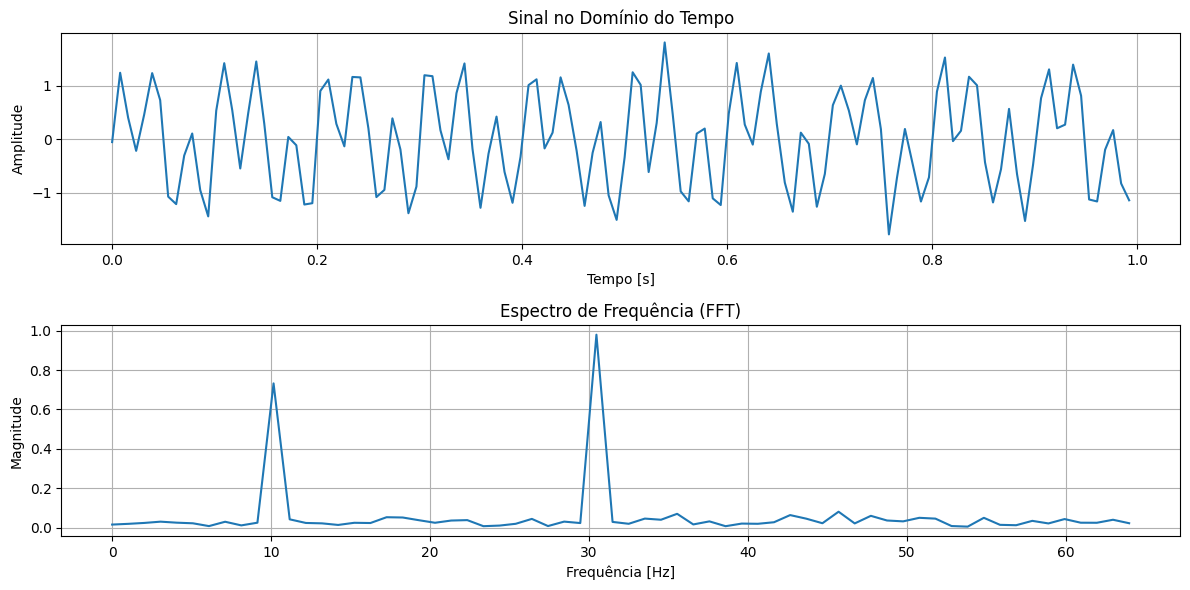

In [ ]:
import numpy as np

def fft(x):
    """
    Implementação recursiva da Transformada Rápida de Fourier (FFT)
    usando o algoritmo de Cooley-Tukey com decimação no tempo.

    Argumentos:
    x (np.array): Um array numpy de números complexos ou reais.
                  O tamanho de x deve ser uma potência de 2.

    Retorna:
    np.array: A Transformada de Fourier de x.
    """
    N = len(x)

    # Caso base da recursão: se o sinal tem apenas uma amostra, a DFT é a própria amostra.
    if N == 1:
        return x

    # Passo 1: Dividir
    # Separa as amostras em índices pares e ímpares.
    x_even = fft(x[::2])
    x_odd = fft(x[1::2])

    # Passo 2 e 3: Conquistar e Combinar
    # Calcula os fatores de torção (twiddle factors)
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N) / N)

    # Combina os resultados usando a operação "butterfly"
    # A primeira metade dos resultados
    result_first_half = x_even + twiddle_factors[:N//2] * x_odd
    # A segunda metade dos resultados
    result_second_half = x_even + twiddle_factors[N//2:] * x_odd

    # Concatena as duas metades para formar o resultado final
    return np.concatenate([result_first_half, result_second_half])

# --- Exemplo de Uso ---

if __name__ == "__main__":
    # Criando um sinal de exemplo: uma soma de duas senoides
    # Frequências de 10 Hz e 30 Hz, com taxa de amostragem de 128 Hz
    # O tamanho do sinal (N) precisa ser uma potência de 2 para esta implementação.
    N = 128  # Número de pontos da FFT (uma potência de 2)
    fs = 128.0 # Taxa de amostragem
    t = np.linspace(0.0, N/fs, N, endpoint=False)

    # Sinal: senoide de 10 Hz com amplitude 0.7 + senoide de 30 Hz com amplitude 1.0
    sinal = 0.7 * np.sin(10.0 * 2.0 * np.pi * t) + 1.0 * np.sin(30.0 * 2.0 * np.pi * t)

    # Adicionando um pouco de ruído para tornar mais realista
    sinal += np.random.randn(N) * 0.2

    # Calcular a FFT
    fft_result = fft(sinal)

    # Calcular o espectro de frequência (as componentes de frequência)
    # O eixo das frequências vai de 0 a fs/2
    freq = np.linspace(0.0, fs/2.0, N//2)

    # A magnitude da FFT nos diz a "força" de cada frequência.
    # Usamos 2.0/N para normalizar a amplitude e pegamos apenas a primeira metade do resultado (a segunda é um espelho).
    magnitude = 2.0/N * np.abs(fft_result[0:N//2])

    print("--- Análise da FFT ---")
    # Encontrando os picos de frequência
    picos_indices = np.argsort(magnitude)[-2:] # Pega os índices das 2 maiores magnitudes
    print(f"As frequências de pico foram encontradas em: {freq[picos_indices].round(2)} Hz")
    print(f"As amplitudes correspondentes são: {magnitude[picos_indices].round(2)}")

    # Opcional: Visualização gráfica (requer matplotlib)
    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(t, sinal)
        plt.title("Sinal no Domínio do Tempo")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Amplitude")
        plt.grid()

        plt.subplot(2, 1, 2)
        plt.plot(freq, magnitude)
        plt.title("Espectro de Frequência (FFT)")
        plt.xlabel("Frequência [Hz]")
        plt.ylabel("Magnitude")
        plt.grid()

        plt.tight_layout()
        plt.show()

    except ImportError:
        print("\nPara visualizar os gráficos, instale a biblioteca matplotlib: pip install matplotlib")

In [ ]:
# 2:17

--- Análise da FFT Recursiva ---
Frequências de pico detectadas: 15.12 Hz e 40.31 Hz
Amplitudes de pico detectadas: 0.81 e 1.01


/tmp/ipython-input-22-834570849.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


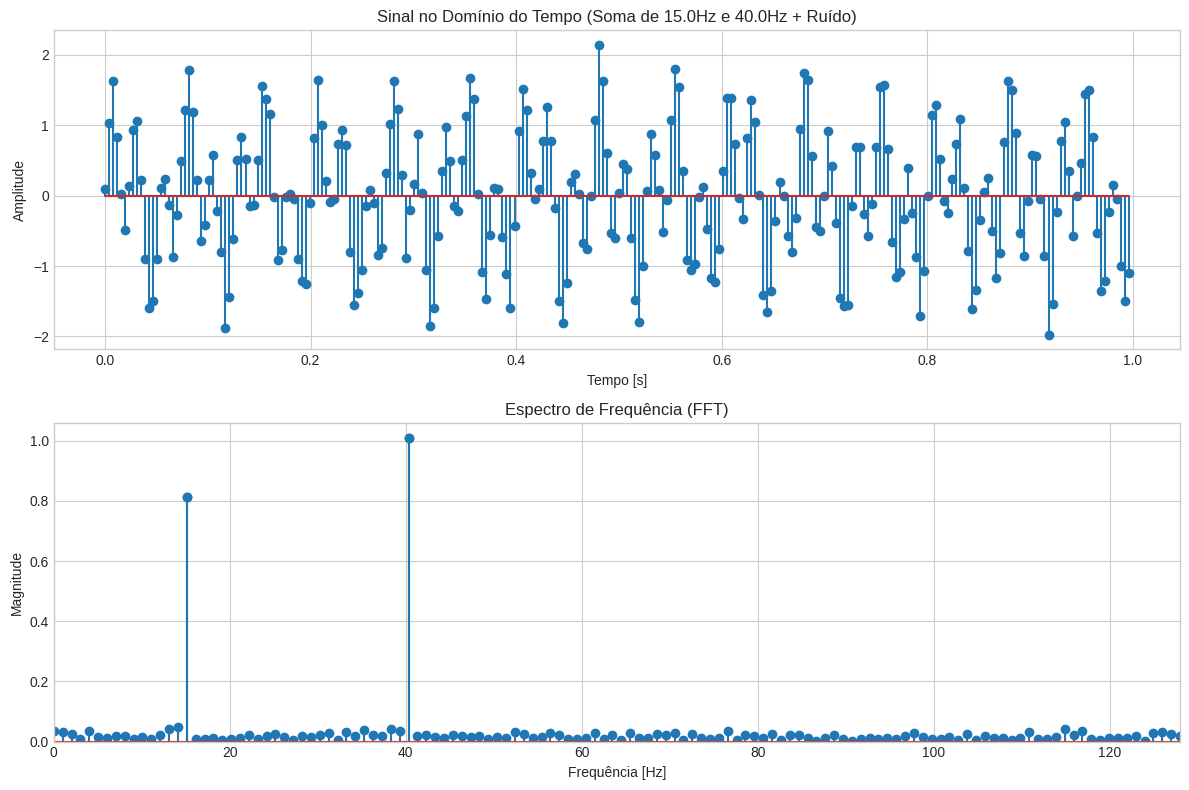

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def fft_recursiva(x):
    """
    Calcula a Transformada Rápida de Fourier (FFT) de um sinal 1D
    usando a implementação recursiva de Cooley-Tukey (decimação no tempo).

    Argumentos:
    x (np.array): Array de entrada (sinal). O tamanho deve ser uma potência de 2.

    Retorna:
    np.array: A Transformada de Fourier do sinal x.
    """
    N = len(x)

    # Validação: Garante que o tamanho da entrada é uma potência de 2.
    if N & (N - 1) != 0 and N > 0:
        raise ValueError("O tamanho da entrada (N) deve ser uma potência de 2.")

    # --- PASSO 1: CASO BASE DA RECURSÃO ---
    # Se o sinal tem apenas uma amostra, a FFT é a própria amostra.
    if N == 1:
        return x

    # --- PASSO 2: DIVIDIR ---
    # Separa o sinal em amostras de índice par e ímpar.
    x_par = x[::2]
    x_impar = x[1::2]

    # --- PASSO 3: CONQUISTAR ---
    # Chama a função recursivamente para cada metade.
    X_par = fft_recursiva(x_par)
    X_impar = fft_recursiva(x_impar)

    # --- PASSO 4: COMBINAR ---
    # Calcula os fatores de torção (twiddle factors) para este nível.
    k = np.arange(N)
    twiddle_factors = np.exp(-2j * np.pi * k / N)

    # Combina os resultados usando a operação "butterfly".
    # Note que X_impar e X_par são de tamanho N/2, então usamos o operador
    # de módulo (%) para acessá-los ciclicamente.
    resultado_final = np.concatenate([
        X_par + twiddle_factors[:N//2] * X_impar,
        X_par + twiddle_factors[N//2:] * X_impar
    ])

    return resultado_final

# --- Bloco de Execução Principal (Exemplo de Uso) ---
if __name__ == "__main__":

    # 1. Definição dos Parâmetros do Sinal
    fs = 256.0  # Taxa de amostragem em Hz
    N = 256     # Número de pontos da FFT (uma potência de 2)
    T = 1.0 / fs # Período de amostragem

    # Vetor de tempo
    t = np.linspace(0.0, N*T, N, endpoint=False)

    # 2. Criação de um Sinal de Teste
    # Sinal composto por duas senoides: 15 Hz (amplitude 0.8) e 40 Hz (amplitude 1.0)
    freq1 = 15.0
    amp1 = 0.8
    freq2 = 40.0
    amp2 = 1.0
    sinal = amp1 * np.sin(freq1 * 2.0 * np.pi * t) + amp2 * np.sin(freq2 * 2.0 * np.pi * t)

    # Adicionando um pouco de ruído para tornar o exemplo mais realista
    sinal += np.random.normal(0, 0.15, N)

    # 3. Cálculo da FFT
    fft_calculada = fft_recursiva(sinal)

    # 4. Pós-processamento para Visualização
    # Cria o eixo de frequências (só precisamos da primeira metade, até fs/2)
    freq_axis = np.linspace(0.0, fs/2.0, N//2)

    # Calcula a magnitude e normaliza
    magnitude = 2.0/N * np.abs(fft_calculada[0:N//2])

    # 5. Apresentação dos Resultados

    # Encontra os picos para verificação
    picos_indices = np.argsort(magnitude)[-2:] # Índices das 2 maiores magnitudes
    freq_picos = freq_axis[picos_indices]
    amp_picos = magnitude[picos_indices]

    print("--- Análise da FFT Recursiva ---")
    print(f"Frequências de pico detectadas: {freq_picos[0]:.2f} Hz e {freq_picos[1]:.2f} Hz")
    print(f"Amplitudes de pico detectadas: {amp_picos[0]:.2f} e {amp_picos[1]:.2f}")

    # Gráficos
    plt.figure(figsize=(12, 8))

    # Gráfico do Sinal no Tempo
    plt.subplot(2, 1, 1)
    plt.stem(t, sinal)
    plt.title(f"Sinal no Domínio do Tempo (Soma de {freq1}Hz e {freq2}Hz + Ruído)")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")

    # Gráfico do Espectro de Frequência
    plt.subplot(2, 1, 2)
    plt.stem(freq_axis, magnitude,)
    plt.title("Espectro de Frequência (FFT)")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Magnitude")
    # Destaca os picos encontrados
    plt.stem(freq_picos, amp_picos)
    plt.legend()
    plt.xlim(0, fs/2.0) # Limita o eixo x até a frequência de Nyquist
    plt.ylim(bottom=0)

    plt.tight_layout() # Ajusta o espaçamento entre os gráficos
    plt.show()